In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.impute import SimpleImputer
import statistics as stats

### Hamza Clustering

In [2]:
survey_environ = pd.read_csv('survey_environ.csv')
labels = []
scaler = StandardScaler()

In [3]:
survey_environ.head()

,Unnamed: 0,objectId,marriageStatus,occupation,educationLevel,latitude,longitude,age,sex,clustersByLoc,...,conditionoRoofinyourhouse,medicalproblemswheredoyougo,dentalproblemswheredoyougo,biggestproblemofcommunity,timesperweektrashcollected,wheretrashleftbetweenpickups,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,houseownership,bathroomAccess
0,0,lLkC5HGPOC,widow,Ama de casa,lessThanprimary,18.914416,-70.745642,67.0,female,1,...,working,Other Hospital,Other Hospital,Roads,1-2,other,1,0,rented,NaN
1,1,gIoG2SAL99,widow,Other,lessThanprimary,18.914196,-70.746286,80.0,male,1,...,poor,Other Hospital,Dentist,Roads,1-2,other,5,0,owned,NaN
2,2,GiArohoFUo,married,Other,college,18.910474,-70.747658,41.0,female,1,...,NaN,Other,Clinic,Other,3-5,other,4,0,NaN,NaN
3,3,rnNw8AxEix,single,Ama de casa,primary,18.910484,-70.747650,40.0,female,1,...,working,Other Hospital,Other,Water,1-2,other,4,0,NaN,NaN
4,4,YBLTPHNqsH,concubine,Other,lessThanprimary,18.915163,-70.741626,59.0,male,1,...,working,Clinic,Other,Other,1-2,street,4,0,NaN,NaN


In [4]:
s_e_cluster = survey_environ.copy()
s_e_cluster = s_e_cluster.drop(["latitude","longitude"],axis=1)
s_e_cluster['objectId'] = s_e_cluster.index
s_e_cluster = pd.get_dummies(s_e_cluster)
s_e_cluster_scaled = scaler.fit_transform(s_e_cluster)

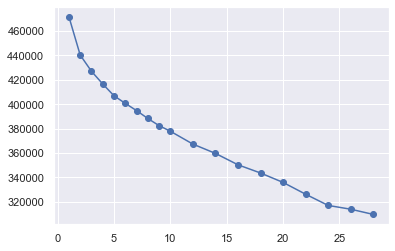

In [12]:
inertias = []
num_clusters = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,26,28]
for k in num_clusters:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(s_e_cluster_scaled)
    inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, "-o")

In [6]:
model_KMeans =  KMeans(n_clusters = 12, random_state = 42)
labels = model_KMeans.fit_predict(s_e_cluster_scaled)
labels

array([5, 5, 5, ..., 6, 6, 6])

In [7]:
labels.size

5423

In [8]:
se_clustered = survey_environ.copy()
se_clustered['cluster'] = labels
se_clustered.head()

,Unnamed: 0,objectId,marriageStatus,occupation,educationLevel,latitude,longitude,age,sex,clustersByLoc,...,medicalproblemswheredoyougo,dentalproblemswheredoyougo,biggestproblemofcommunity,timesperweektrashcollected,wheretrashleftbetweenpickups,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,houseownership,bathroomAccess,cluster
0,0,lLkC5HGPOC,widow,Ama de casa,lessThanprimary,18.914416,-70.745642,67.0,female,1,...,Other Hospital,Other Hospital,Roads,1-2,other,1,0,rented,NaN,5
1,1,gIoG2SAL99,widow,Other,lessThanprimary,18.914196,-70.746286,80.0,male,1,...,Other Hospital,Dentist,Roads,1-2,other,5,0,owned,NaN,5
2,2,GiArohoFUo,married,Other,college,18.910474,-70.747658,41.0,female,1,...,Other,Clinic,Other,3-5,other,4,0,NaN,NaN,5
3,3,rnNw8AxEix,single,Ama de casa,primary,18.910484,-70.747650,40.0,female,1,...,Other Hospital,Other,Water,1-2,other,4,0,NaN,NaN,5
4,4,YBLTPHNqsH,concubine,Other,lessThanprimary,18.915163,-70.741626,59.0,male,1,...,Clinic,Other,Other,1-2,street,4,0,NaN,NaN,5


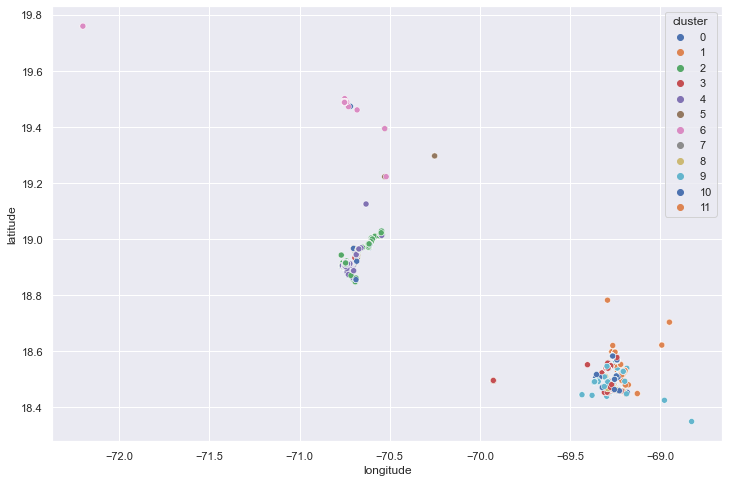

In [9]:
plt.figure(figsize = (12,8))
ax = sns.scatterplot(data = se_clustered, x = "longitude", y = "latitude", hue = "cluster", palette = "deep")

In [19]:
s_e_cluster['cluster'] = labels
pd.set_option('max_columns', None)
by_sum = s_e_cluster.groupby('cluster').sum()
by_sum['clusterVol'] = s_e_cluster.groupby('cluster').count()['objectId']
by_sum = by_sum.drop(["Unnamed: 0", "clustersByLoc"], axis = 1)
by_sum

,objectId,age,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,marriageStatus_concubine,marriageStatus_free_union,marriageStatus_married,marriageStatus_single,marriageStatus_widow,occupation_Agriculture,occupation_Ama de casa,occupation_Comerciante,occupation_Estudiante,occupation_Ninguna,occupation_No trabaja,occupation_Other,educationLevel_college,educationLevel_highschool,educationLevel_lessThanprimary,educationLevel_primary,educationLevel_someCollege,educationLevel_someHighSchool,sex_female,sex_male,province_Lavega,province_San Pedro de Macoris,province_San Pedro de Macoris/North,province_Santiago,yearsLivedinThisHouse_1-2,yearsLivedinThisHouse_3-4,yearsLivedinThisHouse_5-10,yearsLivedinThisHouse_lessThan1,yearsLivedinThisHouse_moreThan10,waterAccess_1AMonth,waterAccess_1AWeek,waterAccess_2-3AWeek,waterAccess_4-6AWeek,waterAccess_Never,waterAccess_everyday,typeofWaterdoyoudrink_bottled,typeofWaterdoyoudrink_filtered,typeofWaterdoyoudrink_tap,latrineAccess_N,latrineAccess_Y,conditionoFloorinyourhouse_cementPoor,conditionoFloorinyourhouse_cementWorking,conditionoFloorinyourhouse_dirtPoor,conditionoFloorinyourhouse_dirtWorking,conditionoRoofinyourhouse_poor,conditionoRoofinyourhouse_working,medicalproblemswheredoyougo_Al Musa Hospital,medicalproblemswheredoyougo_Clinic,medicalproblemswheredoyougo_Other,medicalproblemswheredoyougo_Other Hospital,medicalproblemswheredoyougo_Ramon Santana Hospital,dentalproblemswheredoyougo_Al Musa Hospital,dentalproblemswheredoyougo_Clinic,dentalproblemswheredoyougo_Dentist,dentalproblemswheredoyougo_Other,dentalproblemswheredoyougo_Other Hospital,dentalproblemswheredoyougo_Ramon Santana Hospital,biggestproblemofcommunity_Delinquents,biggestproblemofcommunity_Garbage,biggestproblemofcommunity_Health,biggestproblemofcommunity_Lighting,biggestproblemofcommunity_Other,biggestproblemofcommunity_Roads,biggestproblemofcommunity_Unemployment,biggestproblemofcommunity_Water,timesperweektrashcollected_0,timesperweektrashcollected_1-2,timesperweektrashcollected_13-15,timesperweektrashcollected_3-5,timesperweektrashcollected_6-8,timesperweektrashcollected_Burned,timesperweektrashcollected_Unknown,wheretrashleftbetweenpickups_burned,wheretrashleftbetweenpickups_other,wheretrashleftbetweenpickups_outside house,wheretrashleftbetweenpickups_sidewalk,wheretrashleftbetweenpickups_street,houseownership_owned,houseownership_rented,bathroomAccess_N,bathroomAccess_Y,clusterVol
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,495903,6163.0,450,66,1.0,62.0,16.0,60.0,7.0,23.0,52.0,4.0,4.0,3.0,0.0,60.0,5.0,9.0,98.0,14.0,2.0,17.0,82.0,64.0,2.0,143.0,0.0,1.0,17.0,22.0,15.0,30.0,62.0,1.0,14.0,79.0,5.0,1.0,43.0,33.0,13.0,100.0,51.0,46.0,5.0,10.0,128.0,3.0,102.0,44.0,0.0,15.0,32.0,99.0,0.0,0.0,20.0,6.0,29.0,91.0,0.0,1.0,2.0,0.0,5.0,79.0,45.0,0.0,14.0,5.0,110.0,24.0,0.0,1.0,0.0,6.0,1.0,15.0,63.0,1.0,66.0,123.0,20.0,41.0,49.0,146
1,312159,8890.0,802,128,0.0,121.0,16.0,63.0,8.0,2.0,101.0,0.0,7.0,1.0,5.0,92.0,6.0,26.0,130.0,10.0,1.0,27.0,147.0,61.0,208.0,0.0,0.0,0.0,21.0,18.0,33.0,16.0,119.0,2.0,9.0,7.0,0.0,4.0,186.0,199.0,0.0,6.0,36.0,163.0,51.0,142.0,10.0,3.0,56.0,150.0,3.0,0.0,11.0,1.0,193.0,6.0,1.0,0.0,17.0,1.0,183.0,1.0,35.0,45.0,2.0,93.0,7.0,8.0,17.0,95.0,104.0,0.0,0.0,0.0,0.0,9.0,77.0,49.0,25.0,4.0,53.0,137.0,65.0,16.0,10.0,208
2,2423690,35075.0,2690,352,3.0,342.0,102.0,270.0,50.0,93.0,355.0,9.0,17.0,11.0,1.0,281.0,11.0,76.0,490.0,91.0,6.0,76.0,520.0,247.0,3.0,761.0,0.0,3.0,63.0,69.0,110.0,44.0,479.0,21.0,94.0,300.0,37.0,18.0,284.0,11.0,3.0,751.0,90.0,372.0,249.0,480.0,1.0,24.0,246.0,498.0,0.0,123.0,198.0,446.0,0.0,0.0,25.0,79.0,287.0,376.0,0.0,3.0,8.0,5.0,6.0,372.0,193.0,5.0,175.0,7.0,751.0,0.0,2.0,2.0,0.0,5.0,0.0,135.0,328.0,5.0,299.0,619.0,131.0,57.0,311.0,767
3,2780149,47719.0,3716,506,0.0,425.0,156.0,351.0,62.0,0.0,449.0,14.0,15.0,8.0,36.0,472.0,61.0,147.0,545.0,25.0,14.0,150.0,711.0,283.0,970.0,24.0,0.0,0.0,61.0,80.0,91.0,77.0,685.0,6.0,1

In [18]:
by_sum.columns

Index(['Unnamed: 0', 'objectId', 'age', 'clustersByLoc',
       'numberofIndividualsLivingintheHouse',
       'numberofChildrenLivinginHouseUndertheAgeof5',
       'marriageStatus_concubine', 'marriageStatus_free_union',
       'marriageStatus_married', 'marriageStatus_single',
       'marriageStatus_widow', 'occupation_Agriculture',
       'occupation_Ama de casa', 'occupation_Comerciante',
       'occupation_Estudiante', 'occupation_Ninguna', 'occupation_No trabaja',
       'occupation_Other', 'educationLevel_college',
       'educationLevel_highschool', 'educationLevel_lessThanprimary',
       'educationLevel_primary', 'educationLevel_someCollege',
       'educationLevel_someHighSchool', 'sex_female', 'sex_male',
       'province_Lavega', 'province_San Pedro de Macoris',
       'province_San Pedro de Macoris/North', 'province_Santiago',
       'yearsLivedinThisHouse_1-2', 'yearsLivedinThisHouse_3-4',
       'yearsLivedinThisHouse_5-10', 'yearsLivedinThisHouse_lessThan1',
       'yea

In [20]:
dc = ['clusterVol', 'objectId', 'age']

In [21]:
for col in by_sum.columns:
    if col not in dc:
        by_sum[col] = by_sum[col]/by_sum['clusterVol']
by_sum

,objectId,age,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,marriageStatus_concubine,marriageStatus_free_union,marriageStatus_married,marriageStatus_single,marriageStatus_widow,occupation_Agriculture,occupation_Ama de casa,occupation_Comerciante,occupation_Estudiante,occupation_Ninguna,occupation_No trabaja,occupation_Other,educationLevel_college,educationLevel_highschool,educationLevel_lessThanprimary,educationLevel_primary,educationLevel_someCollege,educationLevel_someHighSchool,sex_female,sex_male,province_Lavega,province_San Pedro de Macoris,province_San Pedro de Macoris/North,province_Santiago,yearsLivedinThisHouse_1-2,yearsLivedinThisHouse_3-4,yearsLivedinThisHouse_5-10,yearsLivedinThisHouse_lessThan1,yearsLivedinThisHouse_moreThan10,waterAccess_1AMonth,waterAccess_1AWeek,waterAccess_2-3AWeek,waterAccess_4-6AWeek,waterAccess_Never,waterAccess_everyday,typeofWaterdoyoudrink_bottled,typeofWaterdoyoudrink_filtered,typeofWaterdoyoudrink_tap,latrineAccess_N,latrineAccess_Y,conditionoFloorinyourhouse_cementPoor,conditionoFloorinyourhouse_cementWorking,conditionoFloorinyourhouse_dirtPoor,conditionoFloorinyourhouse_dirtWorking,conditionoRoofinyourhouse_poor,conditionoRoofinyourhouse_working,medicalproblemswheredoyougo_Al Musa Hospital,medicalproblemswheredoyougo_Clinic,medicalproblemswheredoyougo_Other,medicalproblemswheredoyougo_Other Hospital,medicalproblemswheredoyougo_Ramon Santana Hospital,dentalproblemswheredoyougo_Al Musa Hospital,dentalproblemswheredoyougo_Clinic,dentalproblemswheredoyougo_Dentist,dentalproblemswheredoyougo_Other,dentalproblemswheredoyougo_Other Hospital,dentalproblemswheredoyougo_Ramon Santana Hospital,biggestproblemofcommunity_Delinquents,biggestproblemofcommunity_Garbage,biggestproblemofcommunity_Health,biggestproblemofcommunity_Lighting,biggestproblemofcommunity_Other,biggestproblemofcommunity_Roads,biggestproblemofcommunity_Unemployment,biggestproblemofcommunity_Water,timesperweektrashcollected_0,timesperweektrashcollected_1-2,timesperweektrashcollected_13-15,timesperweektrashcollected_3-5,timesperweektrashcollected_6-8,timesperweektrashcollected_Burned,timesperweektrashcollected_Unknown,wheretrashleftbetweenpickups_burned,wheretrashleftbetweenpickups_other,wheretrashleftbetweenpickups_outside house,wheretrashleftbetweenpickups_sidewalk,wheretrashleftbetweenpickups_street,houseownership_owned,houseownership_rented,bathroomAccess_N,bathroomAccess_Y,clusterVol
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,495903,6163.0,3.082192,0.452055,0.006849,0.424658,0.109589,0.410959,0.047945,0.157534,0.356164,0.027397,0.027397,0.020548,0.000000,0.410959,0.034247,0.061644,0.671233,0.095890,0.013699,0.116438,0.561644,0.438356,0.013699,0.979452,0.0,0.006849,0.116438,0.150685,0.102740,0.205479,0.424658,0.006849,0.095890,0.541096,0.034247,0.006849,0.294521,0.226027,0.089041,0.684932,0.349315,0.315068,0.034247,0.068493,0.876712,0.020548,0.698630,0.301370,0.000000,0.102740,0.219178,0.678082,0.000000,0.000000,0.136986,0.041096,0.198630,0.623288,0.000000,0.006849,0.013699,0.000000,0.034247,0.541096,0.308219,0.000000,0.095890,0.034247,0.753425,0.164384,0.000000,0.006849,0.0,0.041096,0.006849,0.102740,0.431507,0.006849,0.452055,0.842466,0.136986,0.280822,0.335616,146
1,312159,8890.0,3.855769,0.615385,0.000000,0.581731,0.076923,0.302885,0.038462,0.009615,0.485577,0.000000,0.033654,0.004808,0.024038,0.442308,0.028846,0.125000,0.625000,0.048077,0.004808,0.129808,0.706731,0.293269,1.000000,0.000000,0.0,0.000000,0.100962,0.086538,0.158654,0.076923,0.572115,0.009615,0.043269,0.033654,0.000000,0.019231,0.894231,0.956731,0.000000,0.028846,0.173077,0.783654,0.245192,0.682692,0.048077,0.014423,0.269231,0.721154,0.014423,0.000000,0.052885,0.004808,0.927885,0.028846,0.004808,0.000000,0.081731,0.004808,0.879808,0.004808,0.168269,0.216346,0.009615,0.447115,0.033654,0.038462,0.081731,0.456731,0.500000,0.000000,0.000000,0.000000,0.0,0.043269,0.370192,0.235

In [48]:
dfs = []

for i in range(14, 30, 2):
    model_KMeans =  KMeans(n_clusters = i, random_state = 42)
    labels = model_KMeans.fit_predict(s_e_cluster_scaled)
    labels

    se_clustered = survey_environ.copy()
    se_clustered['cluster'] = labels
    se_clustered.head()

    s_e_cluster['cluster'] = labels
    by_sum = s_e_cluster.groupby('cluster').sum()
    by_sum['clusterVol'] = s_e_cluster.groupby('cluster').count()['objectId']
    by_sum = by_sum.drop(["Unnamed: 0", "clustersByLoc"], axis = 1)
    dfs.append(by_sum)

    for col in by_sum.columns:
        if col not in dc:
            by_sum[col] = by_sum[col]/by_sum['clusterVol']

In [49]:
stdevCols = ['bathroomAccess_Y', 'biggestproblemofcommunity_Water', 
             'wheretrashleftbetweenpickups_burned', 'conditionoRoofinyourhouse_poor',
             'waterAccess_everyday', 'typeofWaterdoyoudrink_tap', 'latrineAccess_Y']
#print(stats.stdev(dfs[0]['bathroomAccess_Y']) + stats.st)
best_cluster = i
for i in range(len(dfs)):
    max = 0
    total = 0
    for col in stdevCols:
        total += stats.stdev(dfs[i][col])
        print("Standard Dev of " + col + ": " + str(stats.stdev(dfs[0][col])))
    print("\nTotal Standard Dev. for this cluster: " + str(total) + "\n\n")
    if(total > max):
        best_cluster = i
        max = total
        
print("Best cluster: " + str(i))

Standard Dev of bathroomAccess_Y: 0.2765873300694313
Standard Dev of biggestproblemofcommunity_Water: 0.229300548395688
Standard Dev of wheretrashleftbetweenpickups_burned: 0.2646819049885027
Standard Dev of conditionoRoofinyourhouse_poor: 0.17517451789628516
Standard Dev of waterAccess_everyday: 0.21843492606749956
Standard Dev of typeofWaterdoyoudrink_tap: 0.1641076102768506
Standard Dev of latrineAccess_Y: 0.26756507043436784

Total Standard Dev. for this cluster: 1.5958519081286253


Standard Dev of bathroomAccess_Y: 0.2765873300694313
Standard Dev of biggestproblemofcommunity_Water: 0.229300548395688
Standard Dev of wheretrashleftbetweenpickups_burned: 0.2646819049885027
Standard Dev of conditionoRoofinyourhouse_poor: 0.17517451789628516
Standard Dev of waterAccess_everyday: 0.21843492606749956
Standard Dev of typeofWaterdoyoudrink_tap: 0.1641076102768506
Standard Dev of latrineAccess_Y: 0.26756507043436784

Total Standard Dev. for this cluster: 1.7731730887835349


Standard Dev o

In [52]:
dfs[i]

,objectId,age,numberofIndividualsLivingintheHouse,numberofChildrenLivinginHouseUndertheAgeof5,marriageStatus_concubine,marriageStatus_free_union,marriageStatus_married,marriageStatus_single,marriageStatus_widow,occupation_Agriculture,occupation_Ama de casa,occupation_Comerciante,occupation_Estudiante,occupation_Ninguna,occupation_No trabaja,occupation_Other,educationLevel_college,educationLevel_highschool,educationLevel_lessThanprimary,educationLevel_primary,educationLevel_someCollege,educationLevel_someHighSchool,sex_female,sex_male,province_Lavega,province_San Pedro de Macoris,province_San Pedro de Macoris/North,province_Santiago,yearsLivedinThisHouse_1-2,yearsLivedinThisHouse_3-4,yearsLivedinThisHouse_5-10,yearsLivedinThisHouse_lessThan1,yearsLivedinThisHouse_moreThan10,waterAccess_1AMonth,waterAccess_1AWeek,waterAccess_2-3AWeek,waterAccess_4-6AWeek,waterAccess_Never,waterAccess_everyday,typeofWaterdoyoudrink_bottled,typeofWaterdoyoudrink_filtered,typeofWaterdoyoudrink_tap,latrineAccess_N,latrineAccess_Y,conditionoFloorinyourhouse_cementPoor,conditionoFloorinyourhouse_cementWorking,conditionoFloorinyourhouse_dirtPoor,conditionoFloorinyourhouse_dirtWorking,conditionoRoofinyourhouse_poor,conditionoRoofinyourhouse_working,medicalproblemswheredoyougo_Al Musa Hospital,medicalproblemswheredoyougo_Clinic,medicalproblemswheredoyougo_Other,medicalproblemswheredoyougo_Other Hospital,medicalproblemswheredoyougo_Ramon Santana Hospital,dentalproblemswheredoyougo_Al Musa Hospital,dentalproblemswheredoyougo_Clinic,dentalproblemswheredoyougo_Dentist,dentalproblemswheredoyougo_Other,dentalproblemswheredoyougo_Other Hospital,dentalproblemswheredoyougo_Ramon Santana Hospital,biggestproblemofcommunity_Delinquents,biggestproblemofcommunity_Garbage,biggestproblemofcommunity_Health,biggestproblemofcommunity_Lighting,biggestproblemofcommunity_Other,biggestproblemofcommunity_Roads,biggestproblemofcommunity_Unemployment,biggestproblemofcommunity_Water,timesperweektrashcollected_0,timesperweektrashcollected_1-2,timesperweektrashcollected_13-15,timesperweektrashcollected_3-5,timesperweektrashcollected_6-8,timesperweektrashcollected_Burned,timesperweektrashcollected_Unknown,wheretrashleftbetweenpickups_burned,wheretrashleftbetweenpickups_other,wheretrashleftbetweenpickups_outside house,wheretrashleftbetweenpickups_sidewalk,wheretrashleftbetweenpickups_street,houseownership_owned,houseownership_rented,bathroomAccess_N,bathroomAccess_Y,clusterVol
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,522311,7419.0,3.593583,0.540107,0.000000,0.411765,0.187166,0.352941,0.048128,0.016043,0.374332,0.000000,0.074866,0.016043,0.000000,0.518717,0.176471,0.181818,0.336898,0.037433,0.026738,0.229947,0.807487,0.192513,0.336898,0.657754,0.000000,0.005348,0.112299,0.144385,0.144385,0.155080,0.438503,0.000000,0.069519,0.390374,0.069519,0.048128,0.395722,0.855615,0.000000,0.144385,0.058824,0.331551,0.203209,0.684492,0.064171,0.042781,0.213904,0.759358,0.053476,0.443850,0.139037,0.358289,0.005348,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032086,0.000000,0.037433,0.427807,0.235294,0.000000,0.267380,0.016043,0.898396,0.0,0.064171,0.0,0.0,0.021390,0.016043,0.251337,0.454545,0.021390,0.256684,0.641711,0.326203,0.037433,0.620321,187
1,81948,6592.0,3.726744,0.523256,1.000000,0.000000,0.000000,0.000000,0.000000,0.139535,0.325581,0.000000,0.029070,0.081395,0.000000,0.424419,0.046512,0.093023,0.517442,0.098837,0.029070,0.203488,0.680233,0.319767,0.011628,0.982558,0.000000,0.005814,0.110465,0.162791,0.186047,0.127907,0.395349,0.000000,0.104651,0.453488,0.087209,0.005814,0.319767,0.715116,0.000000,0.273256,0.000000,0.988372,0.331395,0.581395,0.017442,0.040698,0.127907,0.831395,0.000000,0.226744,0.093023,0.680233,0.000000,0.005814,0.040698,0.220930,0.244186,0.488372,0.000000,0.000000,0.052326,0.000000,0.011628,0.191860,0.627907,0.000000,0.116279,0.029070,0.866279,0.0,0.011628,0.0,0.0,0.093023,0.000000,0.162791,0.39534

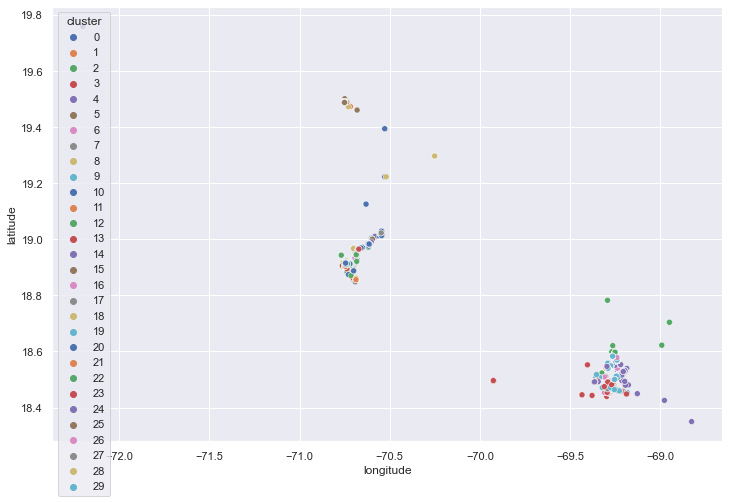

In [55]:
model_KMeans =  KMeans(n_clusters = 30, random_state = 42)
labels = model_KMeans.fit_predict(s_e_cluster_scaled)
labels

se_clustered = survey_environ.copy()
se_clustered['cluster'] = labels
se_clustered.head()

plt.figure(figsize = (12,8))
ax = sns.scatterplot(data = se_clustered, x = "longitude", y = "latitude", hue = "cluster", palette = "deep")